# First Setup

In [102]:
import time
import anki_vector
from anki_vector.util import degrees, distance_mm, speed_mmps, Angle, Pose

Setup and connect to robot

In [103]:
robot = anki_vector.Robot(ip="192.168.0.17",
                       show_viewer=True,
                       show_3d_viewer=True,
                       enable_face_detection=True,
                       enable_custom_object_detection=True,
                       enable_nav_map_feed=True)



22:16:45.869               robot.Robot WARNING  No serial number or name provided. Automatically selecting 00803c3b


In [104]:
robot.connect()


22:16:46.848     connection.Connection    INFO  Connecting to 192.168.0.17:443 for Vector-M7Y9 using C:\Users\MoC19\.anki_vector\Vector-M7Y9-00803c3b.cert


VectorControlTimeoutException: Failed to get control of Vector.

Please verify that Vector is connected to the internet, is on a flat surface, and is fully charged.


Surpassed timeout of 10s

exception calling callback for <Future at 0x18fa996d088 state=finished returned BehaviorControlResponse>
Traceback (most recent call last):
  File "C:\Users\MoC19\Anaconda3\lib\concurrent\futures\_base.py", line 324, in _invoke_callbacks
    callback(self)
  File "C:\Users\MoC19\Anaconda3\lib\asyncio\futures.py", line 362, in _call_set_state
    dest_loop.call_soon_threadsafe(_set_state, destination, source)
  File "C:\Users\MoC19\Anaconda3\lib\asyncio\base_events.py", line 728, in call_soon_threadsafe
    self._check_closed()
  File "C:\Users\MoC19\Anaconda3\lib\asyncio\base_events.py", line 475, in _check_closed
    raise RuntimeError('Event loop is closed')
RuntimeError: Event loop is closed


Test connection

In [ ]:
robot.behavior.say_text("Hello")

Test proximity sensor

In [60]:
distance = robot.proximity.last_sensor_reading.distance
print ("Distance: ", distance)
print ("Distance (mm): ", distance.distance_mm)

Distance:  <Distance 317.00 mm (12.48 inches)>
Distance (mm):  317.0


Stop 5cm in front of obstacle

In [ ]:
robot.behavior.drive_straight(distance_mm(100), speed_mmps(100))

In [ ]:
while robot.proximity.last_sensor_reading.distance.distance_mm > 100:
  print(robot.proximity.last_sensor_reading.distance.distance_mm)
  robot.behavior.drive_straight(distance_mm(30), speed_mmps(100))
print ("Fertig! Abstand: ", robot.proximity.last_sensor_reading.distance.distance_mm)

Automatisches Abstand halten zur Wand

In [21]:
robot.behavior.turn_in_place(degrees(-90))
ref_distance = robot.proximity.last_sensor_reading.distance.distance_mm
robot.behavior.turn_in_place(degrees(90))
print (ref_distance)

    
while 1:
  robot.behavior.drive_straight(distance_mm(100), speed_mmps(150))
  robot.behavior.turn_in_place(degrees(-90))
  distance = robot.proximity.last_sensor_reading.distance.distance_mm
  print (distance)
    
  if ((ref_distance - distance)>0):
    robot.behavior.turn_in_place(degrees(93))
  else:
    robot.behavior.turn_in_place(degrees(87))

156.0
153.0
151.0
160.0
155.0
158.0
159.0
160.0
160.0
152.0
149.0
138.0
166.0
171.0
170.0
166.0
156.0
146.0


KeyboardInterrupt: 

In [46]:
robot.motors.stop_all_motors()

status {
  code: REQUEST_PROCESSING
}

Read map

In [59]:
# Map initialisieren
robot.enable_nav_map_feed=True

#navMap = robot.nav_map.NavMapComponent

robot.nav_map.init_nav_map_feed(frequency=0.5)
latest_nav_map = robot.nav_map.latest_nav_map

# Roboter einmal drehen
#robot.behavior.turn_in_place(degrees(360))
robot.behavior.look_around_in_place()

print ("Map:", latest_nav_map)
print ("Size: ", latest_nav_map.size)
print ("Pose of robot", robot.pose)
print ("X, Y coordinates: ", robot.pose.position.x, robot.pose.position.y)

x = robot.pose.position.x
y = robot.pose.position.y

x = 1

print ("Printing all objects right of robot: ")
while x < 150:
    print (latest_nav_map.get_content(x, y))
    x = x + 1

Map: <NavMapGrid center: <Vector3 x: -64.00 y: -64.00 z: 0.00> size: 256.0>
Size:  256.0
Pose of robot <Pose: <Position x: 0.37 y: -1.79 z: 0.00> <Quaternion q0: 1.00 q1: 0.00 q2: 0.00 q3: -0.01 <Angle Radians: -0.02 Degrees: -1.18>> <Origin Id: 87>>
X, Y coordinates:  0.3667869567871094 -1.790410041809082
Printing all objects right of robot: 
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Unknown
NavNodeContentTypes.Un

Karte über openGL auslesen

In [7]:
#args = anki_vector.util.parse_command_args()
with anki_vector.Robot( show_viewer=True,
                        show_3d_viewer=True,
                        enable_face_detection=True,
                        enable_custom_object_detection=True,
                        enable_nav_map_feed=True):
    print("Starting 3D Viewer. Use Ctrl+C to quit.")

14:49:44.687               robot.Robot WARNING  No serial number or name provided. Automatically selecting 00803c3b
14:49:44.698     connection.Connection    INFO  Connecting to 172.16.5.100:443 for Vector-M7Y9 using C:\Users\MoC19\.anki_vector\Vector-M7Y9-00803c3b.cert
14:49:45.131     connection.Connection    INFO  BehaviorControl control_granted_response { }


InvalidOpenGLGlutImplementation: Install freeglut: You can download it from http://freeglut.sourceforge.net/ 
You just need the `freeglut.dll` file, from any of the 'Windows binaries' downloads. Place the DLL next to your Python script, or install it somewhere in your PATH to allow any script to use it.

In [89]:
# robot.behavior.say_text("Connected")
#     robot.viewer.show()
#   robot.viewer_3d.show()
robot.behavior.say_text("tt coming home")

print("connected---------------------------------------------------------------")
battery_state = robot.get_battery_state()
print("Robot battery Level: {0}".format(battery_state.battery_level))

robot.behavior.set_head_angle(degrees(-5.0))
print("Head Angle Set")
robot.behavior.set_lift_height(0.0)
print("Lift Height Set")

Ausgang = False
counter = 0
abort = 0
returnFromWall = False
angle = 0

# Constants
IntervallCheckingDistanceToWall = 5
DegreesCorrectStraightPath = 0

# Map initialisieren
#robot.enable_nav_map_feed=True

#navMap = robot.nav_map.NavMapComponent

#robot.nav_map.init_nav_map_feed(frequency=0.5)
#latest_nav_map = robot.nav_map.latest_nav_map

# Roboter einmal drehen
#robot.behavior.turn_in_place(degrees(360))
#robot.behavior.look_around_in_place()

print ("Map:", latest_nav_map)
print ("Size: ", latest_nav_map.size)
print ("Pose of robot", robot.pose)
print ("X, Y coordinates: ", robot.pose.position.x, robot.pose.position.y)

def distance():
    return int(robot.proximity.last_sensor_reading.distance.distance_mm)

def moveForward(dist):
    i = 0
    robot.motors.set_wheel_motors(200, 200)
    while i < dist and distance() >= 180:
        i += 1
        time.sleep(0.1)
    robot.motors.stop_all_motors()
    
def correctStraigthPath():
    if (distance() < 100):
        robot.behavior.turn_in_place(degrees((-90 - DegreesCorrectStraightPath)))
    else:
        robot.behavior.turn_in_place(degrees((-90 + DegreesCorrectStraightPath))) 

def edgeCheck():
    robot.behavior.turn_in_place(degrees(-30))
    if (distance() < 50):
        robot.behavior.turn_in_place(degrees(130))
        robot.behavior.drive_straight(distance_mm(50), speed_mmps(50))
        robot.behavior.turn_in_place(degrees(-90))
    else:
        robot.behavior.turn_in_place(degrees(30))
        robot.behavior.turn_in_place(degrees(30))
        if (distance() < 50):
            robot.behavior.turn_in_place(degrees(60))
            robot.behavior.drive_straight(distance_mm(-50), speed_mmps(50))
            robot.behavior.turn_in_place(degrees(-60))
        else:
            robot.behavior.turn_in_place(degrees(-30))
            
#def turnAbsolute(a):
#    nonlocal angle
#    angle += a
#    robot.behavior.turn_in_place(degrees(angle), absolute=True)
            
while Ausgang is False:
    robot.behavior.set_head_angle(degrees(-5.0))
    robot.behavior.set_lift_height(0.0)

    #print("sensor_straight", distance())
    #print("counter_main", counter)
    #print("Angle: ", robot.pose_angle_rad)
    #print ("Pose: ", robot.pose)
    print(angle)
    
    if (distance() >= 200 and counter == 0):
        while (distance() >= 150):
            robot.motors.set_wheel_motors(200, 200)
        else:
            robot.motors.stop_all_motors()
            print("Stop")

    if (distance() < 200):
        robot.behavior.turn_in_place(degrees(-90))
        counter = counter + 1
        print("counter_+1", counter)

    if (distance() >= 200 and counter != 0):           
        #robot.behavior.drive_straight(distance_mm(200), speed_mmps(200))
        moveForward(IntervallCheckingDistanceToWall)
        robot.behavior.turn_in_place(degrees(90))
        print("sensor_wall", distance())
        # Checking distance to wall
        if (distance() < 200):
            correctStraigthPath()
        else:
            #edgeCheck()
            counter = counter - 1
            print("counter -1", counter)

connected---------------------------------------------------------------
Robot battery Level: 2
Head Angle Set


19:44:10.870    util.BehaviorComponent WARNING  set_lift_height cancelled because behavior control was lost
19:44:10.871     connection.Connection    INFO  BehaviorControl control_lost_event { }
19:44:10.877    util.BehaviorComponent    INFO  Delaying _abort until behavior control is granted
19:44:10.884    util.BehaviorComponent    INFO  Delaying set_head_angle until behavior control is granted


Lift Height Set
Map: <NavMapGrid center: <Vector3 x: 320.00 y: -192.00 z: 0.00> size: 1024.0>
Size:  1024.0
Pose of robot <Pose: <Position x: 0.00 y: -0.00 z: 0.00> <Quaternion q0: 1.00 q1: 0.00 q2: 0.00 q3: -0.00 <Angle Radians: -0.00 Degrees: -0.06>> <Origin Id: 143>>
X, Y coordinates:  0.0 -7.697939872741699e-05


19:44:11.768     connection.Connection    INFO  BehaviorControl control_granted_response { }


0
Stop
counter_+1 1
sensor_wall 74
0
sensor_wall 66
0
sensor_wall 67
0
counter_+1 2
sensor_wall 156
0
sensor_wall 142
0
sensor_wall 110
0
sensor_wall 86
0
sensor_wall 68
0
sensor_wall 48
0
sensor_wall 49
0
sensor_wall 47
0
sensor_wall 100
0
sensor_wall 44
0
sensor_wall 49
0
sensor_wall 215
counter -1 1
0
sensor_wall 386
counter -1 0
0
Stop
counter_+1 1
0
counter_+1 2
sensor_wall 109
0
sensor_wall 51
0
sensor_wall 50
0
sensor_wall 289
counter -1 1
0
sensor_wall 137
0
counter_+1 2
sensor_wall 320
counter -1 1
0
sensor_wall 49
0
counter_+1 2
sensor_wall 400
counter -1 1
0
sensor_wall 58
0
counter_+1 2
sensor_wall 400
counter -1 1
0


19:46:06.061     connection.Connection    INFO  BehaviorControl control_lost_event { }
19:46:06.061       util.MotorComponent WARNING  stop_all_motors cancelled because behavior control was lost
19:46:06.074    util.BehaviorComponent    INFO  Delaying turn_in_place until behavior control is granted
19:46:06.159     connection.Connection    INFO  BehaviorControl control_granted_response { }


sensor_wall 400
counter -1 0
0
Stop
counter_+1 1
sensor_wall 60
0
sensor_wall 301
counter -1 0
0
Stop
counter_+1 1
sensor_wall 400
0
sensor_wall 400
counter -1 0
0
counter_+1 1
0
counter_+1 2


KeyboardInterrupt: 

In [19]:
contentArray = []
line = ""
r = 60

for x in range(-r,r):
    for y in range(-r,r):
        line = line + str(latest_nav_map.get_content(x, y)) #+ " "
    print (line)
    line = ""

000000000000111111111111111111111111111111111111111122222222222222222222222211111111111111111111111111111111111111111111
000000000000111111111111111111111111111111111111111122222222222222222222222211111111111111111111111111111111111111111111
000000000000111111111111111111111111111111111111111122222222222222222222222211111111111111111111111111111111111111111111
000000000000111111111111111111111111111111111111111122222222222222222222222211111111111111111111111111111111111111111111
000000000000111111111111111111111111222222222222222222222222222222222222222222222222222222221111111111111111111111111111
000000000000111111111111111111111111222222222222222222222222222222222222222222222222222222221111111111111111111111111111
000000000000111111111111111111111111222222222222222222222222222222222222222222222222222222221111111111111111111111111111
000000000000111111111111111111111111222222222222222222222222222222222222222222222222222222221111111111111111111111111111
00000000000011111111111111111111

In [61]:
robot.disconnect()

# Edge Detection with CV2

## Imports und Verbindungsaufbau

In [105]:
import time
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt 

Verbindung mit dem Roboter herstellen

In [107]:
robot = anki_vector.Robot(show_viewer=True,
                       show_3d_viewer=True)

22:39:41.406               robot.Robot WARNING  No serial number or name provided. Automatically selecting 00803c3b
22:39:41.407               robot.Robot WARNING  enable_nav_map_feed should be True for 3d viewer to render correctly.


In [108]:
robot.connect()

22:39:56.976     connection.Connection    INFO  Connecting to 192.168.0.17:443 for Vector-B6X2 using C:\Users\MoC19\.anki_vector\Vector-B6X2-00803c3b.cert
22:39:57.368     connection.Connection    INFO  BehaviorControl control_granted_response { }


In [113]:
robot.behavior.say_text("Goodbye")
robot.disconnect()

In [109]:
robot.camera.init_camera_feed()
robot.behavior.say_text("Edge")

status {
  code: RESPONSE_RECEIVED
}
state: FINISHED

Arm hochbewegen für besseres Kamerabild

In [110]:
robot.behavior.set_lift_height(1)
robot.behavior.set_head_angle(degrees(-5.0))

status {
  code: RESPONSE_RECEIVED
}
result {
}

## Test der einzelnen Funtionen

### Bildverarbeitung

Orignales Bild abspeichern

In [111]:
imageFromVector = robot.camera.latest_image

Task was destroyed but it is pending!
task: <Task pending coro=<Connection._open_connections() running at C:\Users\MoC19\AppData\Roaming\Python\Python37\site-packages\anki_vector\connection.py:572> wait_for=<Future pending cb=[shield.<locals>._outer_done_callback() at C:\Users\MoC19\Anaconda3\lib\asyncio\tasks.py:820, <TaskWakeupMethWrapper object at 0x0000018FA98F8708>()]>>
Task was destroyed but it is pending!
task: <Task pending coro=<<async_generator_asend without __name__>()> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x0000018FA98F8648>()]> cb=[_wait.<locals>._on_completion() at C:\Users\MoC19\Anaconda3\lib\asyncio\tasks.py:466]>
Task was destroyed but it is pending!
task: <Task pending coro=<WrappedAsyncIterator._next() running at C:\Users\MoC19\AppData\Roaming\Python\Python37\site-packages\aiogrpc\utils.py:194> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x0000018FA98F8588>()]>>
Task was destroyed but it is pending!
task: <Task pending coro=

TypeError: Image data of dtype object cannot be converted to float

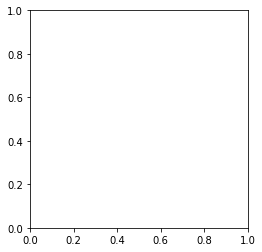

In [114]:
plt.imshow(imageFromVector)
plt.show()

Bild in Grayscale wandeln

In [112]:
image = cv2.cvtColor(np.array(imageFromVector),cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap="gray")
plt.show()

TypeError: Expected Ptr<cv::UMat> for argument 'src'

Bild zuschneiden

In [ ]:
maskArea = np.array([[(125, 200),(175,100), (450, 100), (500, 225)]], dtype=np.int32)
blank = np.zeros_like(image)
mask = cv2.fillPoly(blank, maskArea, 255)
maskedImage = cv2.bitwise_and(image, mask)
plt.imshow(image)
plt.show()

Kantenerkennung

In [ ]:
image_canny = cv2.Canny(maskedImage,50,200,apertureSize=3)

### Roboter an der Kante ausrichten

Hough Transformation durchführen

In [ ]:
rho = 2            
theta = np.pi/180  
threshold = 50    
minLine = 100  
maxLine = 8  
lines = cv2.HoughLinesP(image_canny, rho, theta, threshold, np.array([]), minLineLength=minLine, maxLineGap=maxLine)
print(lines)

Kanten in Bild einzeichnen

In [ ]:
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image_canny,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(image_canny)
plt.show()

Roboter an der Kante zentrieren

In [ ]:
correctionFactor = 1.0

try:
    if lines[0,0,0] < 150: # turn left slightly
        robot.motors.set_wheel_motors(100 * correctionFactor, 100)

    elif lines[1,0,0] > 450: # turn right slightly
        robot.motors.set_wheel_motors(100, 100 * correctionFactor)

    else: # go straight
        robot.motors.set_wheel_motors(100, 100)
except:
    print("didnt find any")

#### TODO
- Nur Kanten im relevanten Bereich finden => Maske anpassen
- Richtige Kante identifizieren, wo kann es zu Verwechslungen kommen?
- Reaktion, wenn keine Kante mehr gefunden wurde

## Implementierung

Bildverarbeitung

In [93]:
def imageTransformation():
    return

In [94]:
def pathCorrection():
    return

In [ ]:
def followEdge():
    for count in range(25):
        while not robot.camera.latest_image:
            time.sleep(1.0)
            
        imageTransformation()
        pathCorrection()
    return